   Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      1             5            1           5.34             5760   
1      1             6            2           5.77             5720   
2      1             7            3           3.69             5790   
3      1             8            4           3.89             5790   
4      1             9            5           5.76             5700   
5      1            12            1           6.39             5720   
6      1            13            2           4.73             5760   
7      1            14            3           4.35             5780   
8      1            15            4           3.94             5830   
9      1            16            5           7.00             5870   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0           3        51                    54                45.32   
1           4        69                    35                49.64   
2       

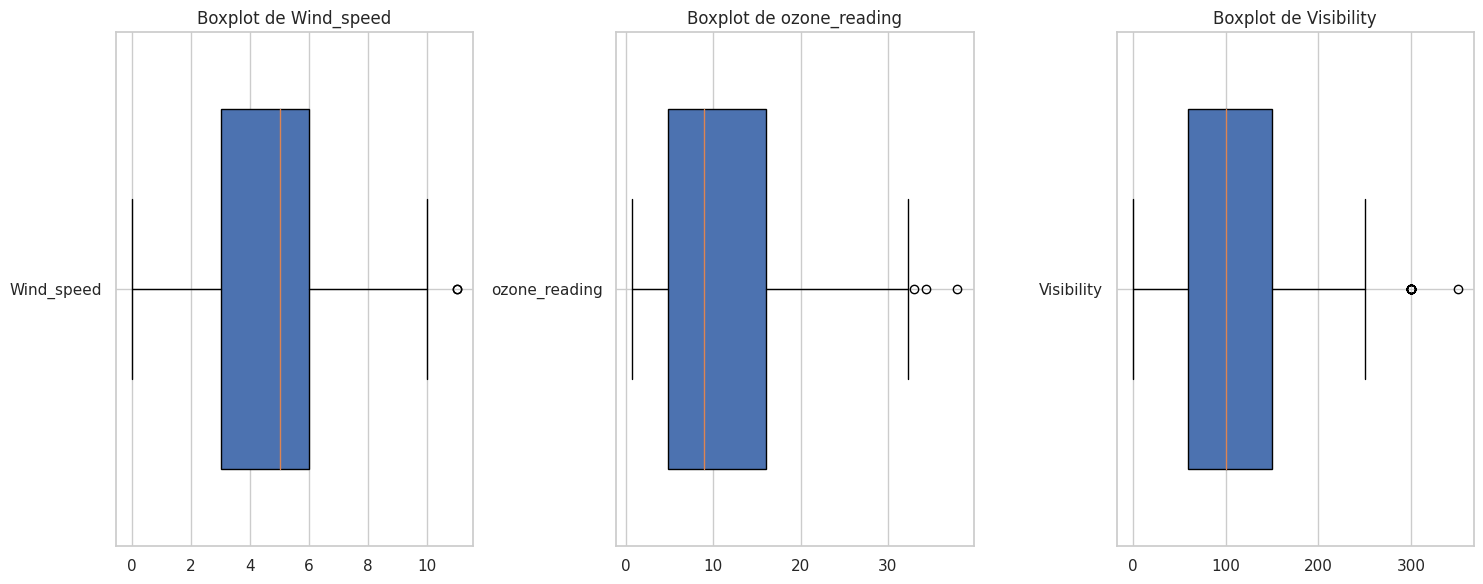

In [48]:

import pandas as pd
import matplotlib.pyplot as plt
import os
url = "/content/ozone.csv"
df = pd.read_csv(url,sep=';')
print(df.head(10))


**1.- (0,75 puntos)** Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading, Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso

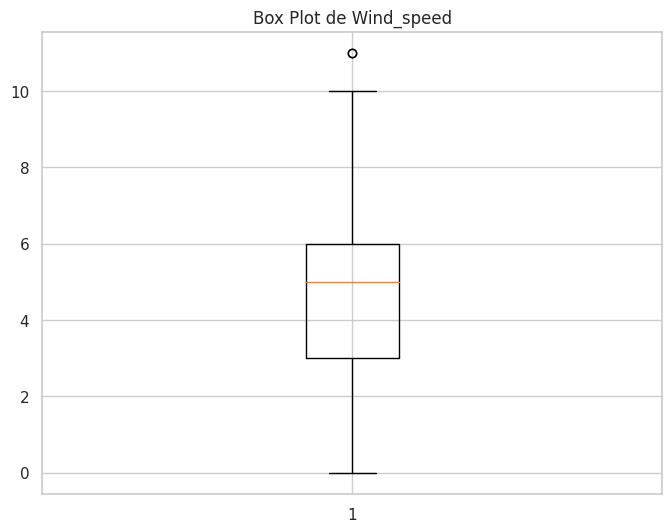

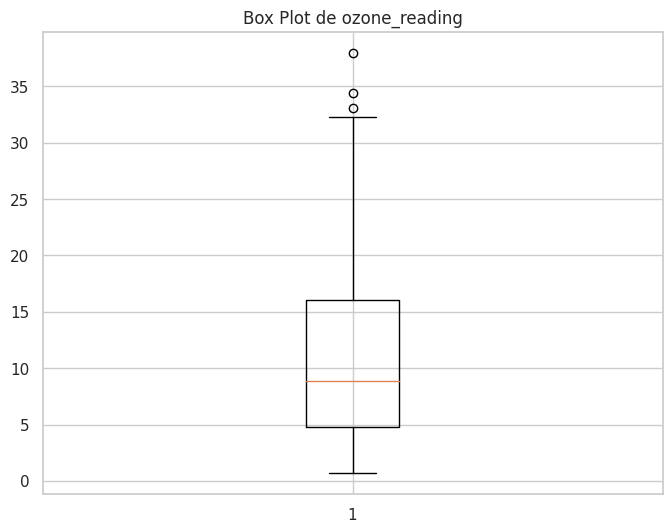

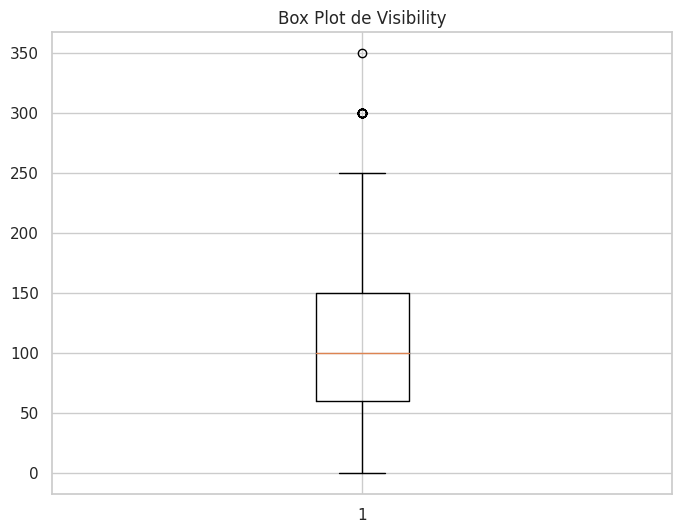

In [49]:
# Seleccionar variables de interés
outlier_variables = ['Wind_speed', 'ozone_reading', 'Visibility']
# Crear gráficos de caja (box plots) para cada variable
for variable in outlier_variables:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[variable])
    plt.title(f'Box Plot de {variable}')
    plt.show()

Se seleccionan las variables de interés (Wind_speed, ozone_reading, Visibility) y se crean gráficos de caja (boxplot) para cada una de ellas. Utiliza un bucle para recorrer cada variable, generando un box plot individual para visualizar la distribución de los datos y detectar posibles outliers.

** Wind_speed (Velocidad del Viento):**

*Mediana:* Aproximadamente 5 m/s.

*Cuartiles (Q1 y Q3)*: 3 m/s y 6 m/s.

*Rango Intercuartil (IQR):* 3 m/s.

*Bigotes:* 0 m/s y 9 m/s.

*Outliers:* Un punto por encima del bigote superior (alrededor de 11 m/s).

La mayoría de las velocidades del viento se encuentran entre 3 m/s y 6 m/s. Un valor atípico indica una ráfaga de viento inusualmente fuerte (aproximadamente 11 m/s).

**Ozone_reading (Lectura de Ozono):**

*Mediana:* Aproximadamente 9.

*Cuartiles (Q1 y Q3):* 5 y 16.

*Rango Intercuartil (IQR):* 11.

*Bigotes:* 1 y 32 aproximadamente.

*Outliers:* Tres punto por encima del bigote superior (alrededor de 33, 34, 39).

La mayoría de las lecturas de ozono se encuentran entre 5 y 16. Unos valores atípico indican un nivel de ozono inusualmente alto (aproximadamente 33,34 y 39).

 **Visibility (Visibilidad):**

*Mediana:* Aproximadamente 100.
*Cuartiles (Q1 y Q3):* 60 y 150.
*Rango Intercuartil (IQR):* 90.
*Bigotes:* 0 y 250.
*Outliers:* Dos puntos por encima del bigote superior (alrededor de 300 y 350).

La mayoría de las visibilidades se encuentran entre 60 y 150. los outliers  expresa valores atípicamente altos (300 y 350)

**2.- (0,75 puntos)** Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”

In [39]:
# Seleccionar las variables de interés
variables_interes = ['Wind_speed', 'Visibility']
# Calcular el rango intercuartílico (IQR)
Q1W = df['Wind_speed'].quantile(0.25)
Q3W = df['Wind_speed'].quantile(0.75)
IQR_wind_speed = Q3W - Q1W

# Definir los límites para identificar outliers en Wind_speed
lower_limit_wind_speed = Q1W - 1.5 * IQR_wind_speed
upper_limit_wind_speed = Q3W + 1.5 * IQR_wind_speed

# Identificar outliers en Wind_speed
outliers_wind_speed = df[(df['Wind_speed'] < lower_limit_wind_speed) | (df['Wind_speed'] > upper_limit_wind_speed)]

# Calcular el rango intercuartílico (IQR) para Visibility
Q1V = df['Visibility'].quantile(0.25)
Q3V = df['Visibility'].quantile(0.75)
IQR_visibility = Q3V - Q1V

# Definir los límites para identificar outliers en Visibility
lower_limit_visibility = Q1V - 1.5 * IQR_visibility
upper_limit_visibility = Q3V + 1.5 * IQR_visibility

# Identificar outliers en Visibility
outliers_visibility = df[(df['Visibility'] < lower_limit_visibility) | (df['Visibility'] > upper_limit_visibility)]

# Intersección de outliers
intersection_outliers = pd.merge(outliers_wind_speed, outliers_visibility, how='inner')

# Unión de outliers
union_outliers = pd.merge(outliers_wind_speed, outliers_visibility, how='outer')



print("\nIntersección de outliers:")
print(intersection_outliers[variables_interes])

print("\nUnión de outliers:")
print(union_outliers[variables_interes])




Intersección de outliers:
   Wind_speed  Visibility
0          11         350

Unión de outliers:
    Wind_speed  Visibility
0           11         350
1           11         200
2           10         300
3            5         300
4            8         300
5            7         300
6            5         300
7            7         300
8            0         300
9            3         300
10           6         300
11           6         300
12           7         300
13           5         300
14           7         300
15           4         300
16           0         300
17           4         300


Con este apartado, se permite identificar y comparar los outliers en las variables de velocidad del viento y visibilidad. Al calcular la intersección y unión de outliers entre estas variables, se obtiene información valiosa para comprender mejor la relación entre ellas y detectar posibles anomalías en los datos de la base analizada.

**3.- (1 punto)** Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?

ozone_reading           float64
Temperature_Sandburg    float64
dtype: object


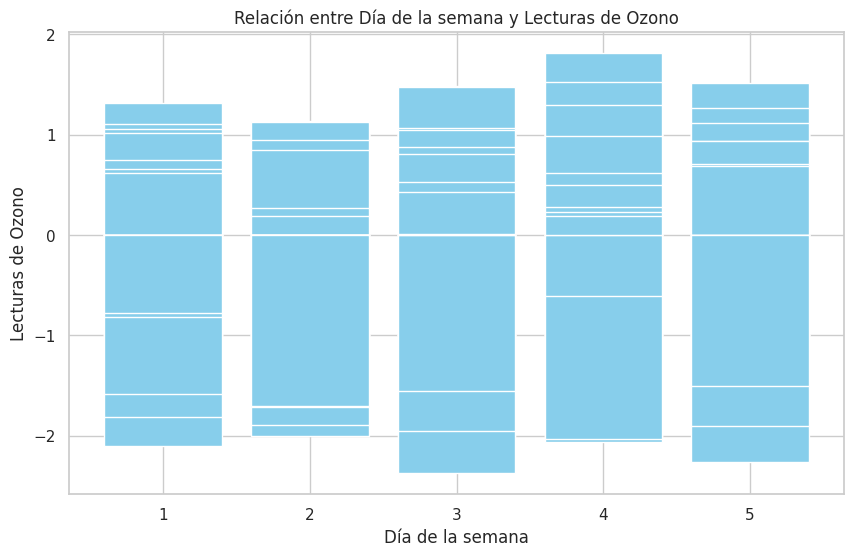

In [45]:
# Crear un gráfico de barras para representar la relación entre "Day_of_week" y "Ozone_reading"
plt.figure(figsize=(10, 6))
plt.bar(df['Day_of_week'], df['ozone_reading'], color='skyblue')
plt.xlabel('Día de la semana')
plt.ylabel('Lecturas de Ozono')
plt.title('Relación entre Día de la semana y Lecturas de Ozono')
plt.show()



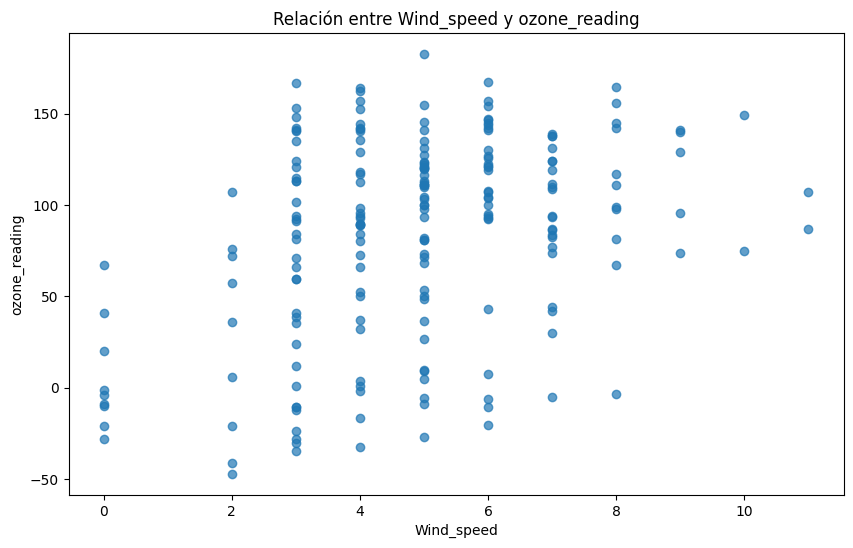

In [6]:
# Definir rangos para categorías
def categorizar_valor(valor):
    if valor < 40:
        return 'Bajo'
    elif 40 <= valor < 70:
        return 'Medio'
    else:
        return 'Alto'

df['Wind_speed_cat'] = df['Wind_speed'].apply(categorizar_valor)
df['ozone_reading_cat'] = df['ozone_reading'].apply(categorizar_valor)

# Crear un scatter plot sin Seaborn
plt.figure(figsize=(10, 6))

# Filtrar y graficar cada categoría por separado
for category in df['Wind_speed_cat'].unique():
    subset = df[df['Wind_speed_cat'] == category]
    plt.scatter(subset['Wind_speed'], subset['ozone_reading'], label=category, alpha=0.7)

# Personalizar la visualización
plt.title('Relación entre Wind_speed y ozone_reading')
plt.xlabel('Wind_speed')
plt.ylabel('ozone_reading')

plt.show()

<Figure size 1000x600 with 0 Axes>

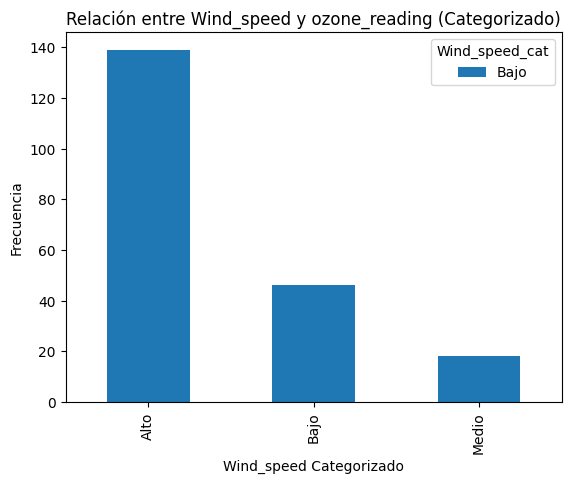

In [9]:
df['Wind_speed_cat'] = df['Wind_speed'].apply(categorizar_valor)
df['ozone_reading_cat'] = df['ozone_reading'].apply(categorizar_valor)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Contar la frecuencia de cada combinación de categorías
cross_tab = pd.crosstab(df['ozone_reading_cat'],df['Wind_speed_cat'])

# Graficar el resultado
cross_tab.plot(kind='bar', stacked=True)

# Personalizar la visualización
plt.title('Relación entre Wind_speed y ozone_reading (Categorizado)')
plt.xlabel('Wind_speed Categorizado')
plt.ylabel('Frecuencia')
plt.show()

**4.- (1 punto)** Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.


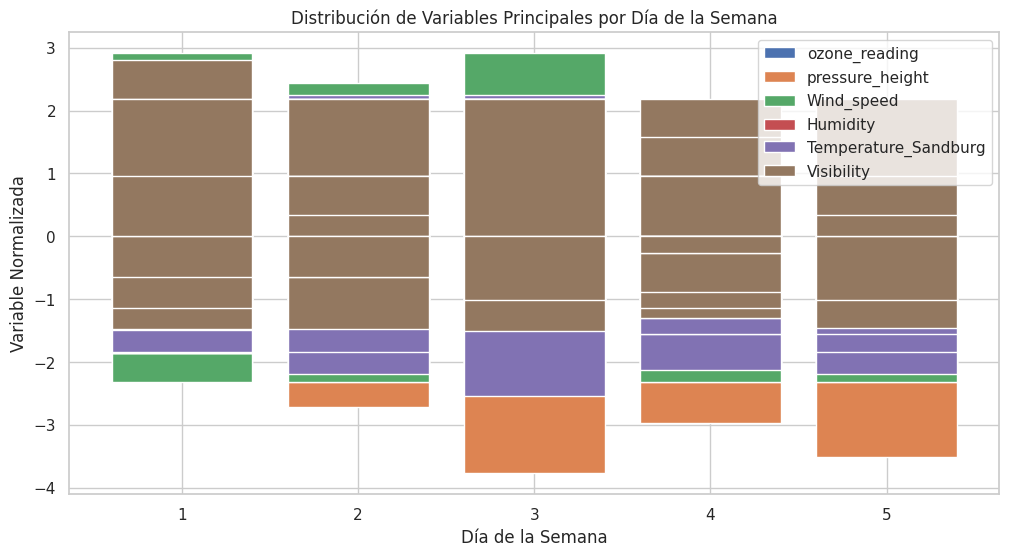

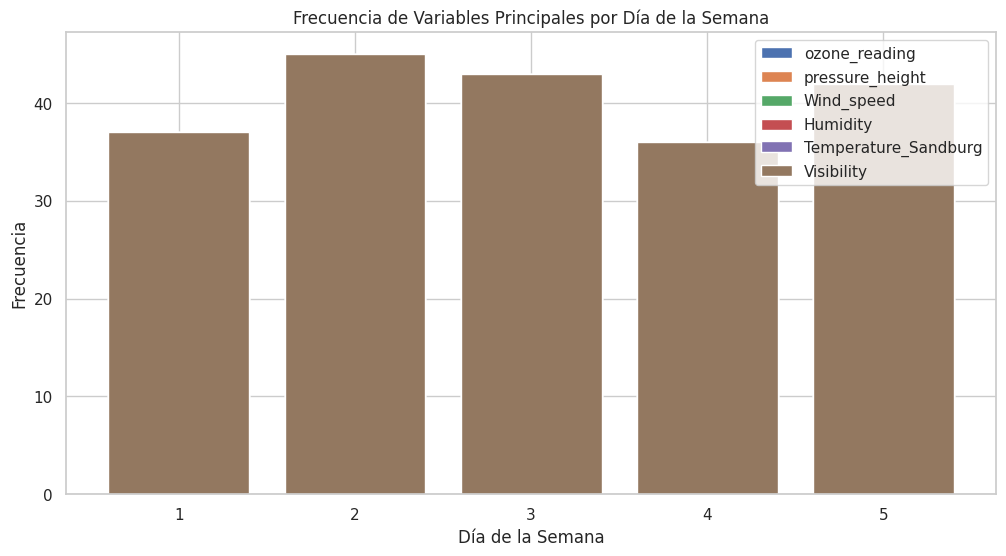

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

variables_principales = ['ozone_reading','pressure_height','Wind_speed', 'Humidity',  'Temperature_Sandburg','Visibility']

# Normalizar las variables principales
normalized_df = df.copy()
for variable in variables_principales:
    normalized_df[variable] = (df[variable] - df[variable].mean()) / df[variable].std()

# Crear gráfico de barras apiladas para la distribución
plt.figure(figsize=(12, 6))

# Creamos una lista para almacenar las barras de cada variable
bars = []
for variable in variables_principales:
    bar = plt.bar(normalized_df['Day_of_week'], normalized_df[variable], label=variable)
    bars.append(bar)

plt.title('Distribución de Variables Principales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Variable Normalizada')
plt.legend(loc='upper right')
plt.show()

# Crear gráfico de barras para las frecuencias
plt.figure(figsize=(12, 6))

# Contar las ocurrencias de cada variable para cada día de la semana
frequencies = df.groupby('Day_of_week')[variables_principales].count()

for variable in variables_principales:
    plt.bar(frequencies.index, frequencies[variable], label=variable)

plt.title('Frecuencia de Variables Principales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

<ipython-input-41-af7f03f0e078>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Month', ax=axes[0], multiple="stack", palette="viridis")
<ipython-input-41-af7f03f0e078>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Month', y='ozone_reading', ax=axes[1], stat="probability", common_norm=False, palette="viridis")


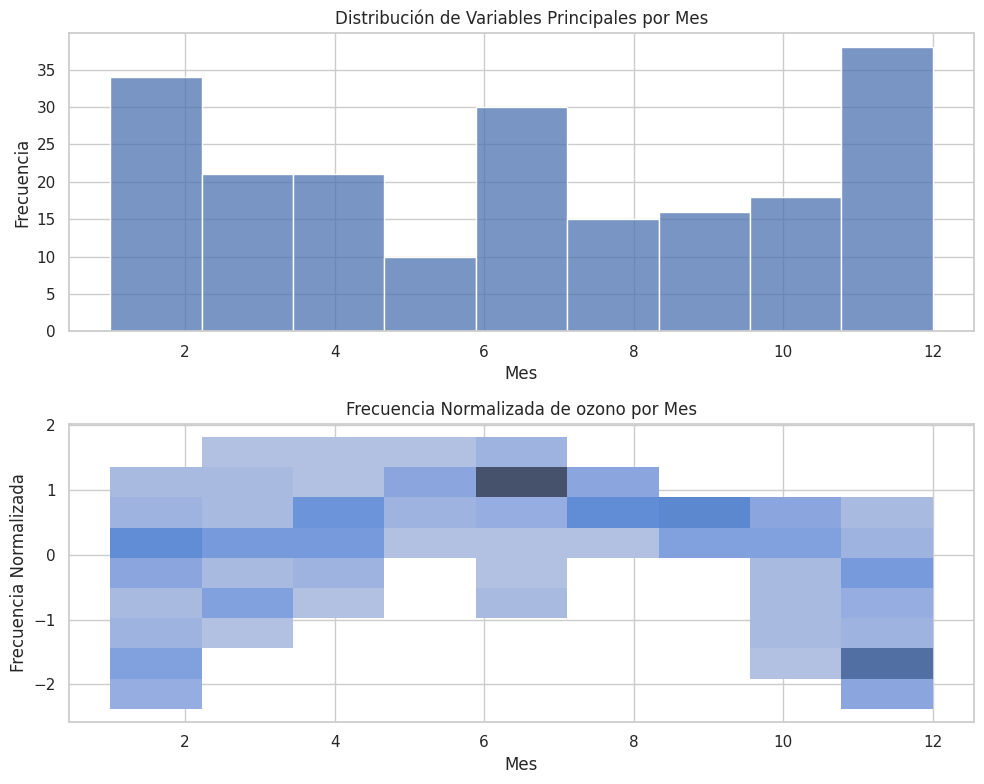

In [41]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas de interés
selected_columns = ['ozone_reading', 'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_Sandburg', 'Visibility']

# Normalizar las variables seleccionadas
scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Diagrama de barras para la distribución
sns.histplot(data=df, x='Month', ax=axes[0], multiple="stack", palette="viridis")
axes[0].set_title('Distribución de Variables Principales por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Frecuencia')

# Diagrama de barras para la frecuencia normalizada
sns.histplot(data=df, x='Month', y='ozone_reading', ax=axes[1], stat="probability", common_norm=False, palette="viridis")
axes[1].set_title('Frecuencia Normalizada de ozono por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Frecuencia Normalizada')

# Ajustar diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


